In [2]:
using Pkg; Pkg.activate("C:\\Users\\KarlH\\Desktop\\ComputationalPhysicsMaster\\Code\\OrbitalNeuralMethods")
using Revise
using OrbitalNeuralMethods
import OrbitalNeuralMethods as onm

  Activating project at `C:\Users\KarlH\Desktop\ComputationalPhysicsMaster\Code\OrbitalNeuralMethods`
┌ Info: Precompiling OrbitalNeuralMethods [6de8678a-dd1c-461e-a987-24da1d9562b4]
└ @ Base loading.jl:1662


In [3]:
n = 2

ω = 0.25
ham = HOCoulomb(ω, shielding = 0.25);

In [4]:
l = 10
basis = SpinBasis(HOBasis(l, ω))
grid = [x for x in range(-10, stop = 10, length = 2001)]
system = System(n, basis, grid, ham);

mixer = Alpha(0.5)
rhf = setup_RHF(system, mixer);
rhf = compute_ground_state!(rhf, max_iter = 1000, tol = 1e-10, verbose=0);
energy(rhf)

1.17957942722023

In [220]:
wf = Slater(rhf)
samples = 2^26
metro = Importance(equils = 1e5, samples = samples, step = 0.1);
#metro = Metropolis(equils = 1e4, samples = samples, step = 0.1);
samples

67108864

In [223]:
@time result = blocking(wf, ham, metro, nthreads = 8);

digits = Integer(-floor(log10(result.E_err))) + 1
print("$(round(result.E, digits=digits)) ± $(round(result.E_err, digits=digits)) Δ = $(round(result.E - energy(rhf), digits=digits))")

 11.886700 seconds (612 allocations: 5.500 GiB, 13.08% gc time)
1.17848 ± 0.00083 Δ = -0.0011

In [227]:
rhf_p_density = particle_density(System(rhf));

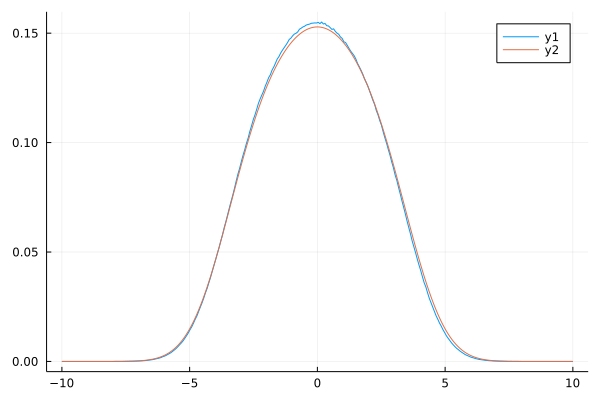

In [229]:
ob_result = onebody(wf, ham, metro, start = -10, stop = 10, length = 300, nthreads = 8);
(; radius, oneBodyDensity) = ob_result;

plt.plot(radius, oneBodyDensity)
plt.plot!(grid, rhf_p_density./2)